## Extract information from the given website

In [2]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

Scrape the **name of the programming language** and **average annual salary**.  

In [4]:
# import required libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

Download the webpage at the url 

In [6]:
data = requests.get(url).text

Create a soup object

In [8]:
soup = BeautifulSoup(data, 'html.parser')

In [9]:
table = soup.find('table')

Scrape the `Language name` and `annual average salary`. 

In [11]:
for row in table.find_all('tr'):
    cols = row.find_all('td')
    lan_name = cols[1].getText()
    ann_sal = cols[3].getText()
    print("{}----->{}".format(lan_name, ann_sal))

Language----->Average Annual Salary
Python----->$114,383
Java----->$101,013
R----->$92,037
Javascript----->$110,981
Swift----->$130,801
C++----->$113,865
C#----->$88,726
PHP----->$84,727
SQL----->$84,793
Go----->$94,082


Save the scrapped data into a file named popular-languages.csv

In [13]:
data = []

for row in table.find_all('tr'):
    cols = row.find_all('td')
    lan_name = cols[1].getText()
    ann_sal = cols[3].getText()
    print("{}----->{}".format(lan_name, ann_sal))
    data.append([lan_name, ann_sal])
    
df = pd.DataFrame(data, columns=['Language', 'Average Annual Salary'])


Language----->Average Annual Salary
Python----->$114,383
Java----->$101,013
R----->$92,037
Javascript----->$110,981
Swift----->$130,801
C++----->$113,865
C#----->$88,726
PHP----->$84,727
SQL----->$84,793
Go----->$94,082


In [14]:
df

,Language,Average Annual Salary
0,Language,Average Annual Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"
6,C++,"$113,865"
7,C#,"$88,726"
8,PHP,"$84,727"
9,SQL,"$84,793"


In [15]:
# Save the dataframe to a csv file
df.to_csv('popular-languages.csv', index=False)
print('Data saved to popular-languages.csv')

Data saved to popular-languages.csv


In [16]:
df.max()

Language                                 Swift
Average Annual Salary    Average Annual Salary
dtype: object

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

In [54]:
df = df.drop(0)

In [69]:
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace('$', '', regex = False)
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace(',', '', regex = False)
df['Average Annual Salary'] = df['Average Annual Salary'].astype('float')

In [91]:
df = df.sort_values(by = 'Average Annual Salary', ascending = False)

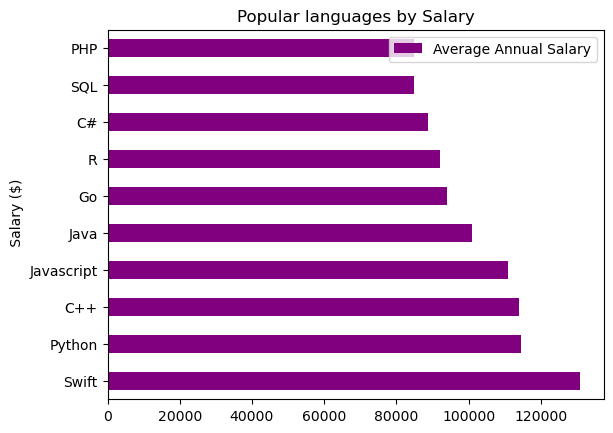

In [99]:
df.plot(kind = 'barh',
        x = 'Language',
        y = 'Average Annual Salary',
       color = 'Purple')

plt.title('Popular languages by Salary')
plt.ylabel(' Salary ($)')
plt.show()